# Stackoverflow Employee Salary Prediction

![Credit: flex jobs](https://fjwp.s3.amazonaws.com/blog/wp-content/uploads/2021/02/18095635/Salary-Range.png)


Using Stackoverflow's anual developer survey data, we'll build a machine learning model to predict employeee salaries based on certain features in the dataset.

---


In [1]:
import requests, zipfile, io, os

import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
url = "https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip"

file = requests.get(url)
zipf = zipfile.ZipFile(io.BytesIO(file.content))
expracted_data = zipf.extractall(os.mkdir('./survey-data'))

In [3]:
df = pd.read_csv('/content/survey_results_public.csv')
df.tail(1)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
83438,83439,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Professional degree (JD, MD, etc.)",11 - 17 years,School,14,...,18-24 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,21168.0


## Clean the data

In [4]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head(3)

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN


In [5]:
df = df[df['Salary'].notnull()]
df.head(3)

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [7]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [8]:
# employed full-time

df = df[df['Employment'] == 'Employed full-time']
df = df.drop('Employment', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [9]:
df.Country.value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [10]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [11]:
country_map = shorten_categories(df.Country.value_counts(), 300)
df['Country'] = df['Country'].map(country_map)

df.Country.value_counts()

United States of America                                9175
Other                                                   7335
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
France                                                  1396
Brazil                                                  1340
Spain                                                    890
Netherlands                                              835
Australia                                                825
Poland                                                   775
Italy                                                    756
Russian Federation                                       741
Sweden                                                   735
Turkey                                                   458
Switzerland             

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


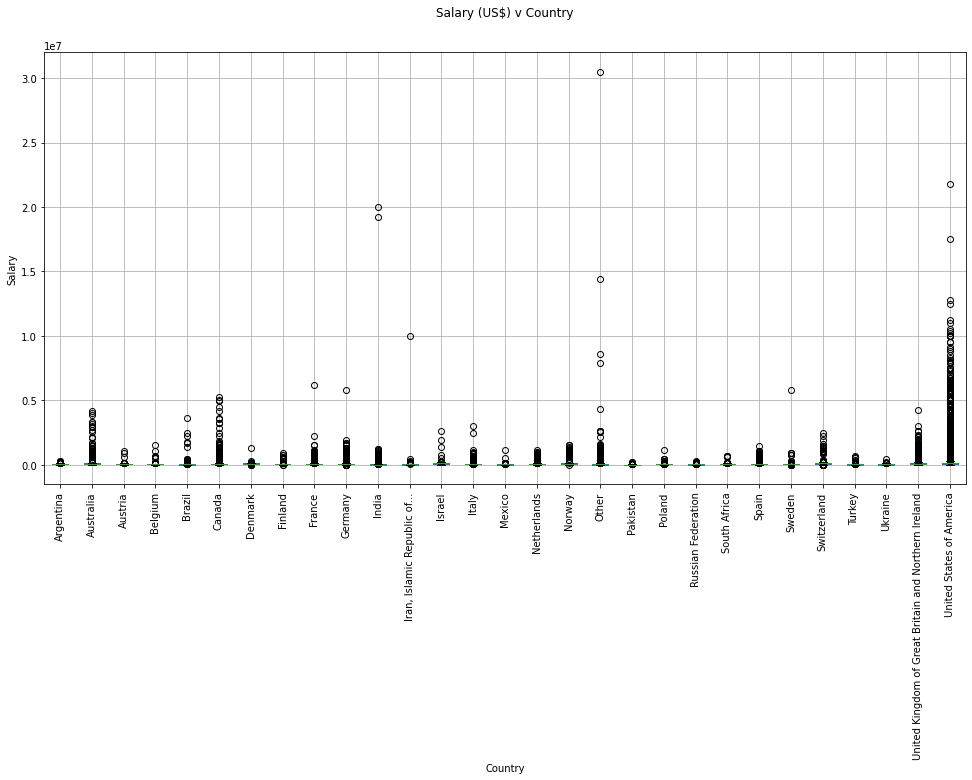

In [12]:
import matplotlib.pyplot as plt

fig1, ax = plt.subplots(1,1, figsize=(16, 8))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [13]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


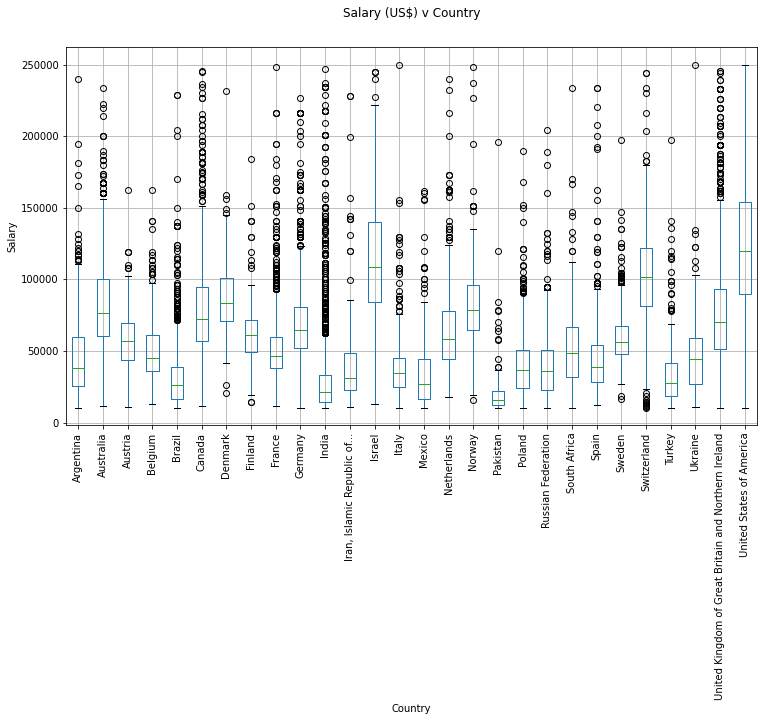

In [14]:
fig2, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
df.YearsCodePro.unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '20', '39', '27', '23', '30', '19',
       '35', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [16]:
# function to clean the yearscodepro column
def clean_years_code_pro(answer):
  if answer == 'Less than 1 year':
    return 1
  if answer == 'More than 50 years':
    return 50
  return float(answer)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_years_code_pro)


In [17]:
df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [18]:
def clean_ed_level(answer):
    if 'Bachelor’s degree' in answer:
        return 'Bachelor’s degree'
    if 'Master’s degree' in answer:
        return 'Master’s degree'
    if 'Professional degree' in answer or 'Other doctoral' in answer:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_ed_level)

In [19]:
df.EdLevel.unique()

array(['Master’s degree', 'Bachelor’s degree', 'Post grad',
       'Less than a Bachelors'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()

df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([2, 0, 3, 1])

In [21]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([22, 21,  9, 24,  5,  8, 23, 26, 19, 12, 25, 27,  4, 13, 15, 18,  2,
        1,  3, 11, 10,  6,  7,  0, 20, 17, 16, 14])

In [22]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
9,22,2,4.0,51552.0
11,21,0,5.0,46482.0
12,9,2,6.0,77290.0
16,24,0,2.0,17748.0
17,5,0,6.0,46135.0


## Feature Extraction

In [23]:
X = df.drop('Salary', axis=1)
y = df['Salary']


In [24]:
linear_model = LinearRegression()
linear_model.fit(X, y.values)

LinearRegression()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_val, y_train, y_val = train_test_split(X, y.values,test_size=0.2, random_state=10)

tree_model = DecisionTreeClassifier(random_state=1)

tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [26]:
# random forest model

from sklearn.ensemble import RandomForestRegressor
train_X, val_X, train_y, val_y = train_test_split(X, y.values,random_state = 0)

forest_model = RandomForestRegressor(random_state=1)

forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [27]:
# Linear predictions
linear_predict = linear_model.predict(X)

In [28]:
# tree predictions
tree_predict = tree_model.predict(X_val)

In [29]:
# random predictions
random_predict = forest_model.predict(X_val)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
# linear model error
import numpy as np

linear_error = np.sqrt(mean_squared_error(y, linear_predict))
linear_error

41738.96761763857

In [32]:
# tree model error
tree_error = mean_absolute_error(y_val, tree_predict)
tree_error

26258.33538883179

In [33]:
# random forest model error
random_error = mean_absolute_error(y_val, random_predict)
random_error

22703.046116715523

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

max_depth = [None, 2,4,6,8,10,12, 14]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)

grid_search = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
grid_search.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12, 14]},
             scoring='neg_mean_squared_error')

In [35]:
regressor = grid_search.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
# error = np.sqrt(mean_squared_error(y, y_pred))
error = mean_absolute_error(y, y_pred)

print("${:,.02f}".format(error))

$21,836.88


In [36]:
X

,Country,EdLevel,YearsCodePro
9,22,2,4.0
11,21,0,5.0
12,9,2,6.0
16,24,0,2.0
17,5,0,6.0
...,...,...,...
83430,27,2,21.0
83432,5,0,1.0
83434,27,0,5.0
83436,27,1,4.0


In [37]:
X = pd.DataFrame({"Country":["United States"],
                   "EdLevel": ["Master's Degree"],
                   "YearsCodePro": [12]})
X

,Country,EdLevel,YearsCodePro
0,United States,Master's Degree,12


In [38]:
encoder = LabelEncoder()

In [39]:
X['Country'] = encoder.fit_transform(X['Country'])
X['EdLevel'] = encoder.fit_transform(X['EdLevel'])

In [40]:
X

,Country,EdLevel,YearsCodePro
0,0,0,12


In [41]:
X.YearsCodePro = X['YearsCodePro'].astype(float)

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       1 non-null      int64  
 1   EdLevel       1 non-null      int64  
 2   YearsCodePro  1 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 152.0 bytes


In [43]:
X_pred = regressor.predict(X)

In [44]:
X_pred

array([66007.58333333])

In [45]:
import pickle

In [47]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [48]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [49]:
y_pred = regressor_loaded.predict(X)
y_pred

array([66007.58333333])